In [44]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets

In [45]:
from utils import Logger

In [46]:
def mnist_data():
    compose = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5,), (.5,))
        ])
    out_dir = './dataset'
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)
# Load data
data = mnist_data()
# Create loader with data, so that we can iterate over it
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True)
# Num batches
num_batches = len(data_loader)

In [47]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
discriminator = DiscriminatorNet()

In [48]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [49]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet()

In [50]:
def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

In [51]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [52]:
loss = nn.BCELoss()

In [53]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

In [54]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [55]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [56]:
num_test_samples = 16
test_noise = noise(num_test_samples)

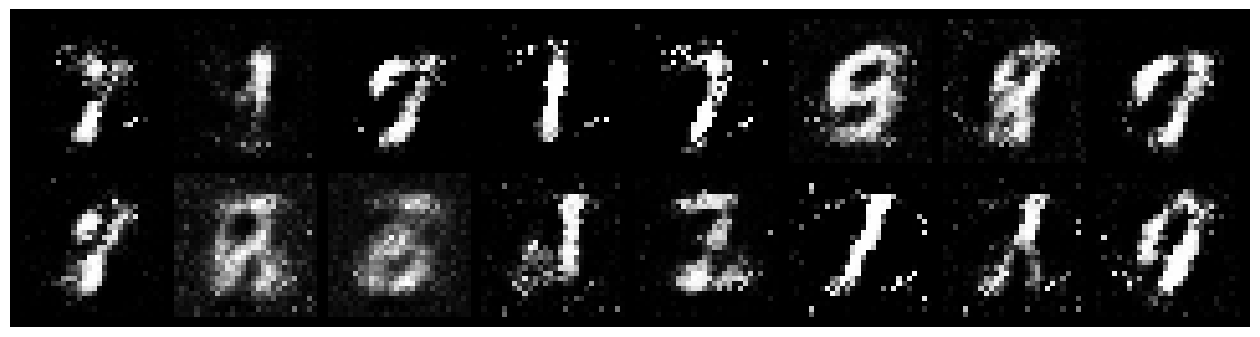

Epoch: [0/200], Batch Num: [599/600]
Discriminator Loss: 0.6671, Generator Loss: 2.5389
D(x): 0.7335, D(G(z)): 0.1952


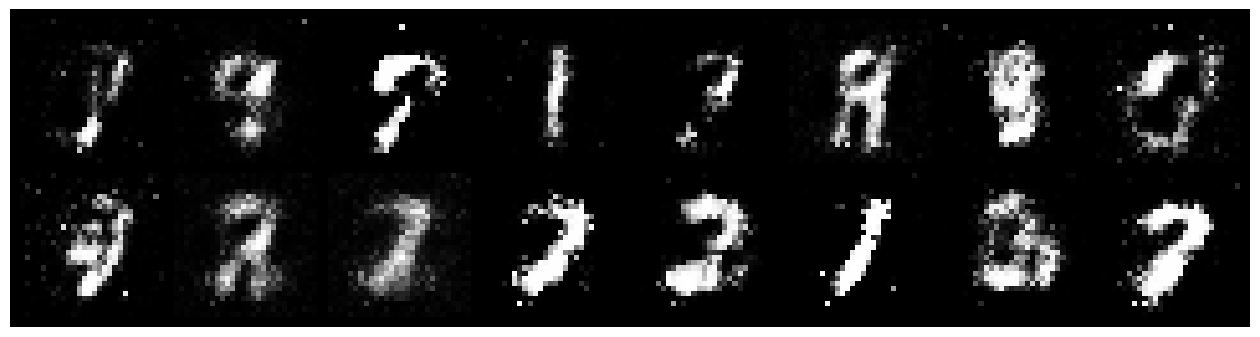

Epoch: [1/200], Batch Num: [599/600]
Discriminator Loss: 0.6666, Generator Loss: 1.8515
D(x): 0.8189, D(G(z)): 0.2546


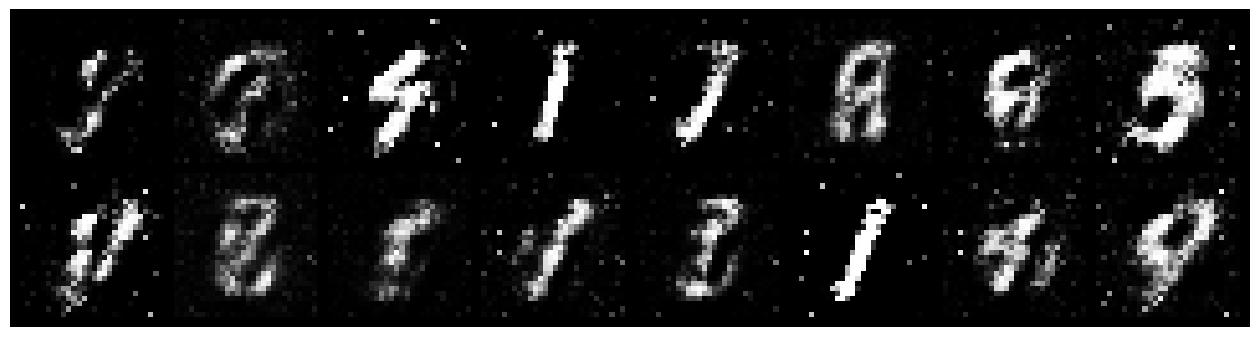

Epoch: [2/200], Batch Num: [599/600]
Discriminator Loss: 0.5239, Generator Loss: 2.5148
D(x): 0.8248, D(G(z)): 0.1910


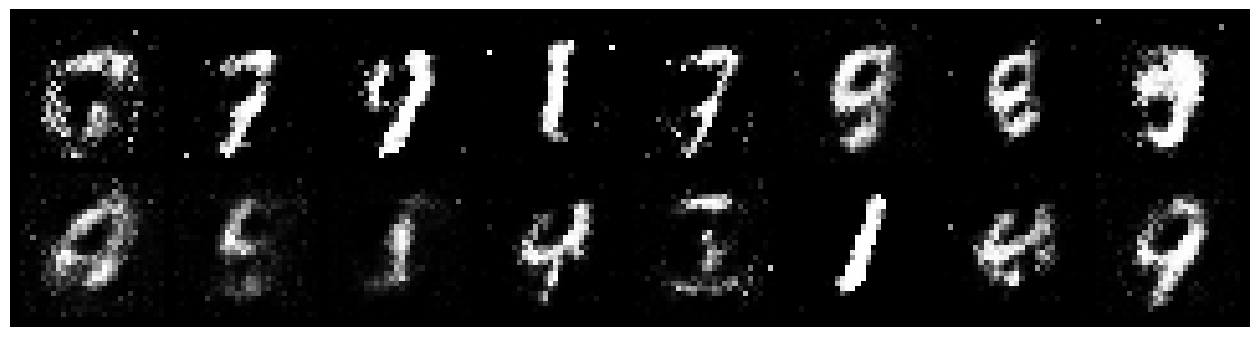

Epoch: [3/200], Batch Num: [599/600]
Discriminator Loss: 0.7888, Generator Loss: 1.6574
D(x): 0.7458, D(G(z)): 0.2505


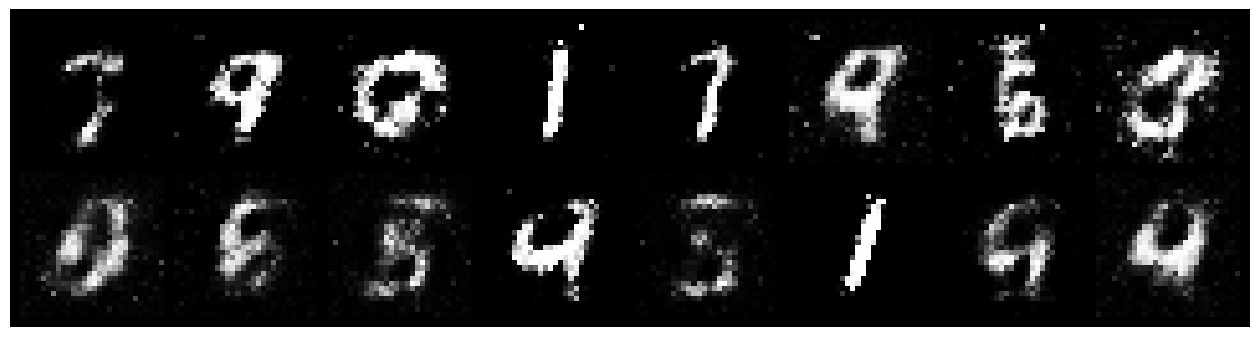

Epoch: [4/200], Batch Num: [599/600]
Discriminator Loss: 0.7026, Generator Loss: 1.9621
D(x): 0.7804, D(G(z)): 0.2498


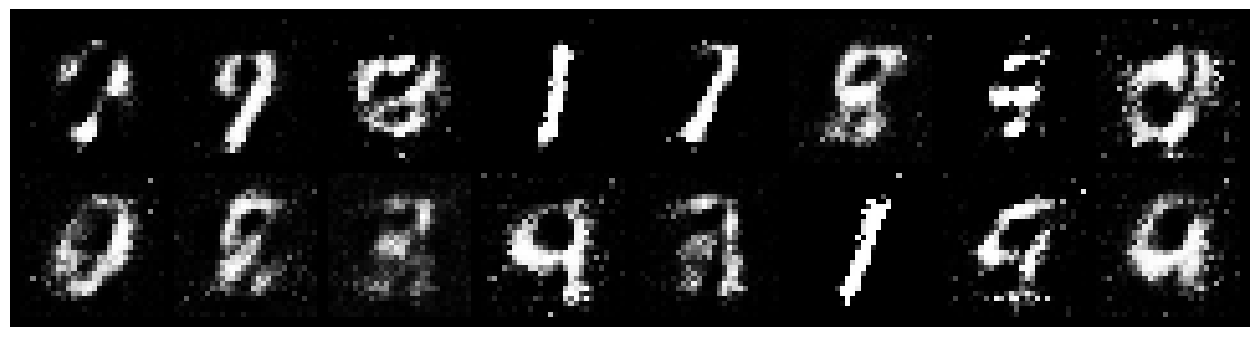

Epoch: [5/200], Batch Num: [599/600]
Discriminator Loss: 0.8229, Generator Loss: 1.4195
D(x): 0.6772, D(G(z)): 0.2360


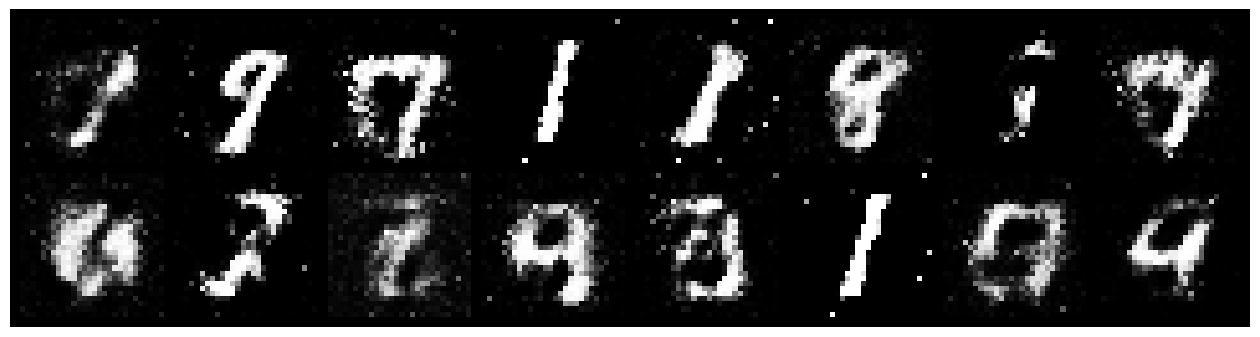

Epoch: [6/200], Batch Num: [599/600]
Discriminator Loss: 0.7426, Generator Loss: 1.5951
D(x): 0.7967, D(G(z)): 0.3079


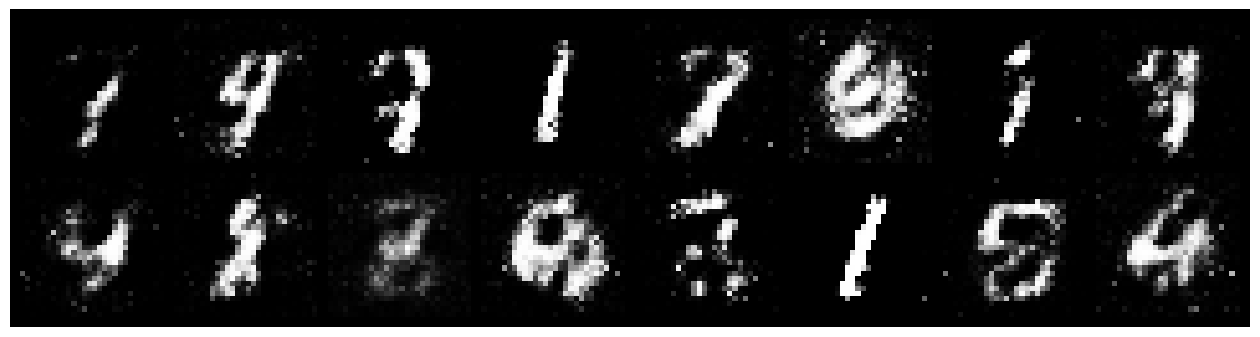

Epoch: [7/200], Batch Num: [599/600]
Discriminator Loss: 0.7978, Generator Loss: 1.7392
D(x): 0.7389, D(G(z)): 0.2573


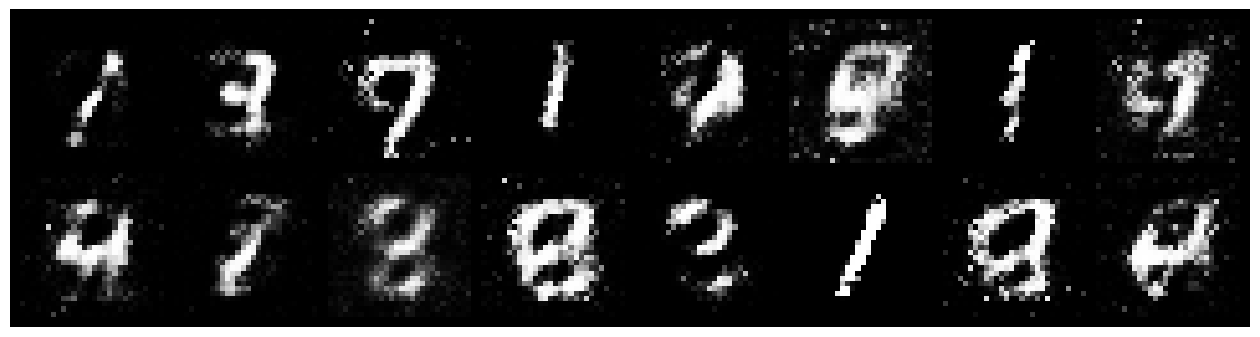

Epoch: [8/200], Batch Num: [599/600]
Discriminator Loss: 0.9953, Generator Loss: 1.4652
D(x): 0.6963, D(G(z)): 0.3117


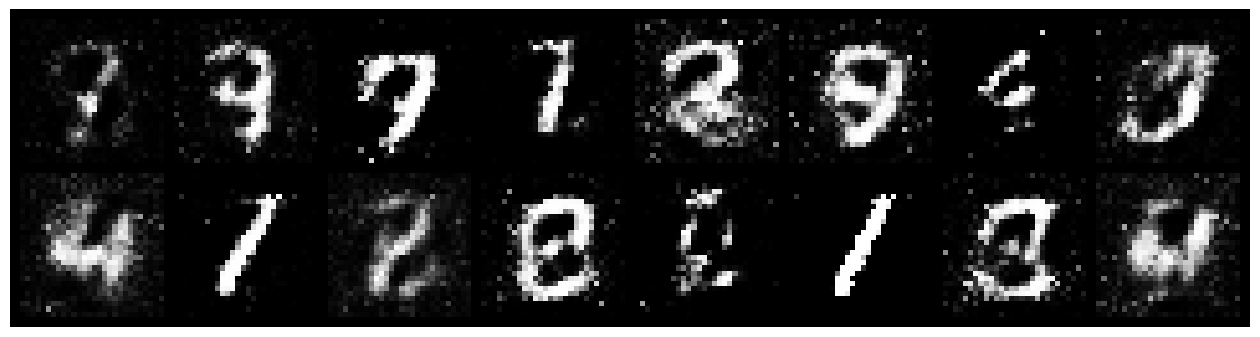

Epoch: [9/200], Batch Num: [599/600]
Discriminator Loss: 0.8801, Generator Loss: 1.9883
D(x): 0.6710, D(G(z)): 0.2219


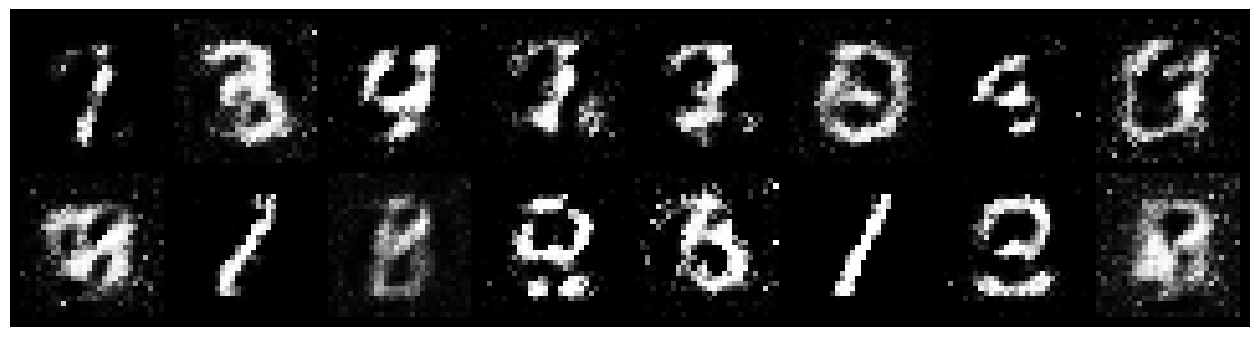

Epoch: [10/200], Batch Num: [599/600]
Discriminator Loss: 0.9077, Generator Loss: 2.1424
D(x): 0.7418, D(G(z)): 0.3164


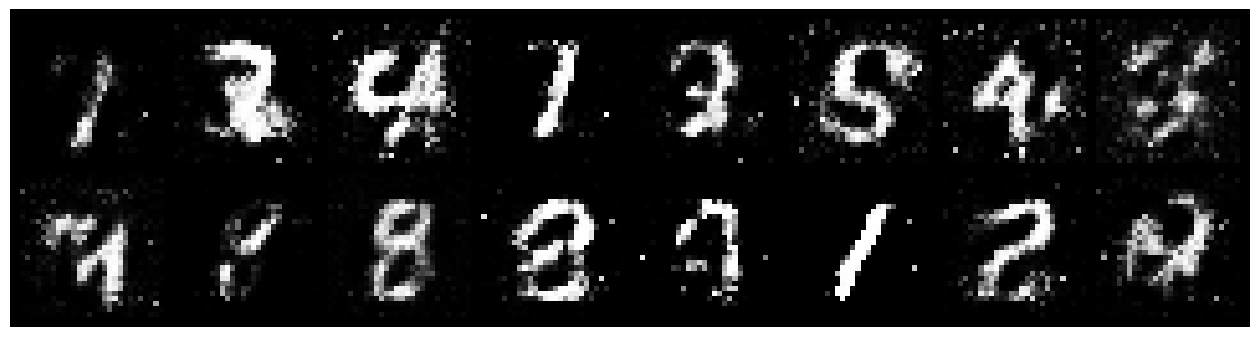

Epoch: [11/200], Batch Num: [599/600]
Discriminator Loss: 0.8052, Generator Loss: 1.7707
D(x): 0.7924, D(G(z)): 0.3472


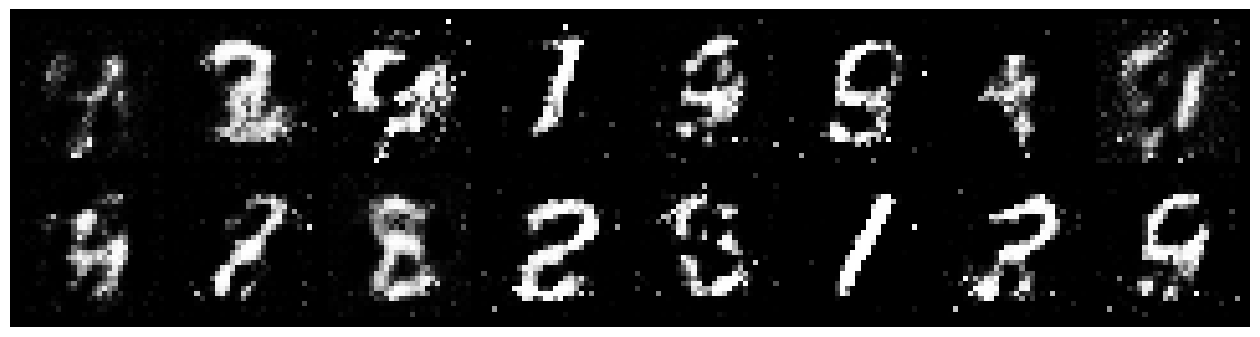

Epoch: [12/200], Batch Num: [599/600]
Discriminator Loss: 1.0782, Generator Loss: 1.1246
D(x): 0.6436, D(G(z)): 0.3987


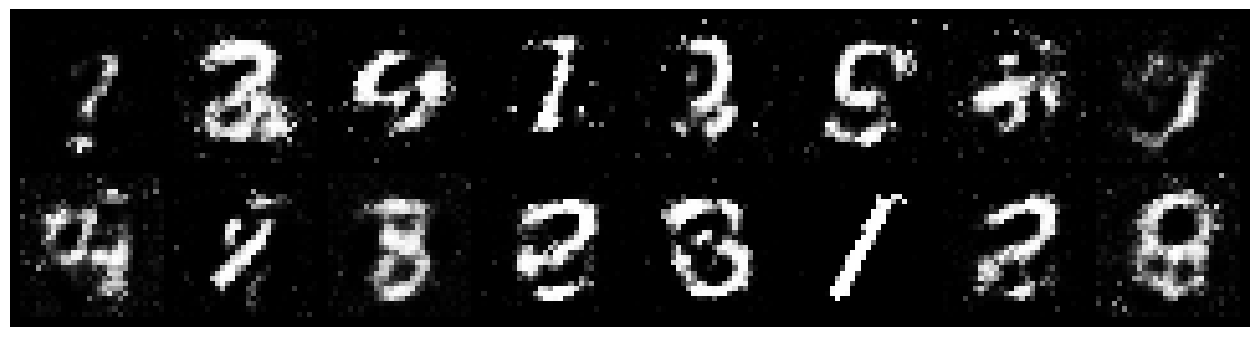

Epoch: [13/200], Batch Num: [599/600]
Discriminator Loss: 0.9970, Generator Loss: 1.5433
D(x): 0.6813, D(G(z)): 0.3252


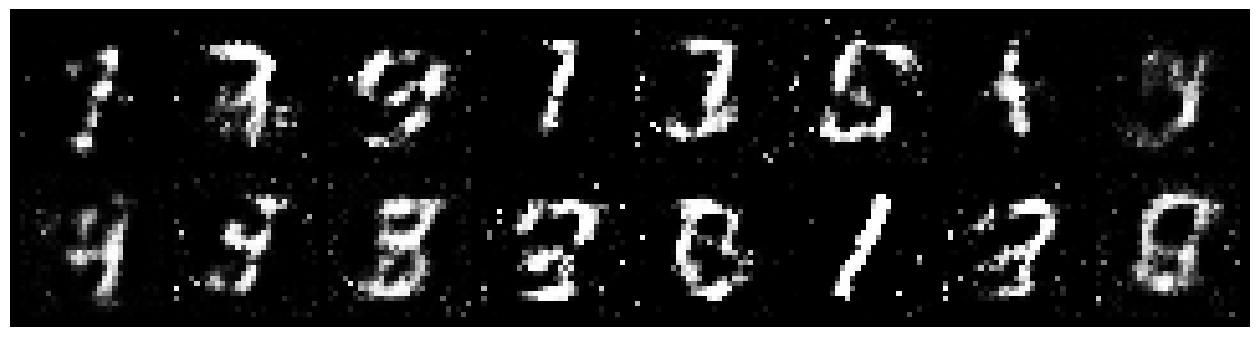

Epoch: [14/200], Batch Num: [599/600]
Discriminator Loss: 0.9637, Generator Loss: 1.2850
D(x): 0.7052, D(G(z)): 0.3582


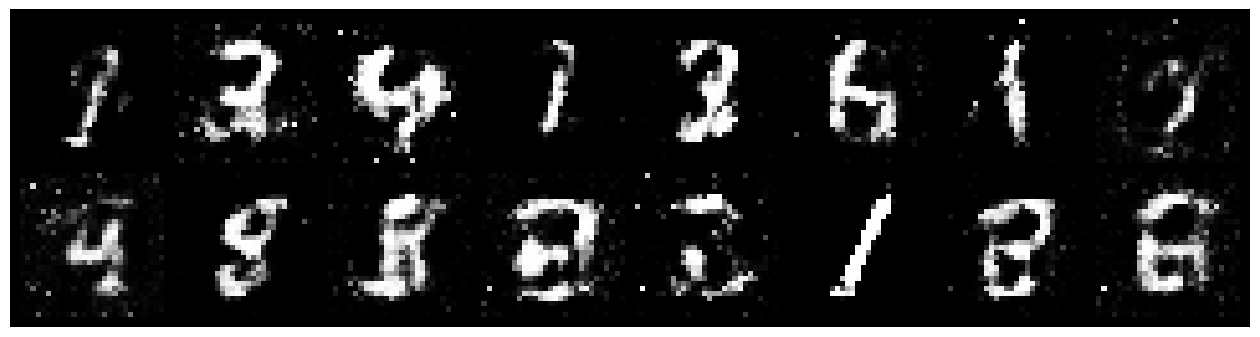

Epoch: [15/200], Batch Num: [599/600]
Discriminator Loss: 1.0110, Generator Loss: 1.6180
D(x): 0.6770, D(G(z)): 0.3177


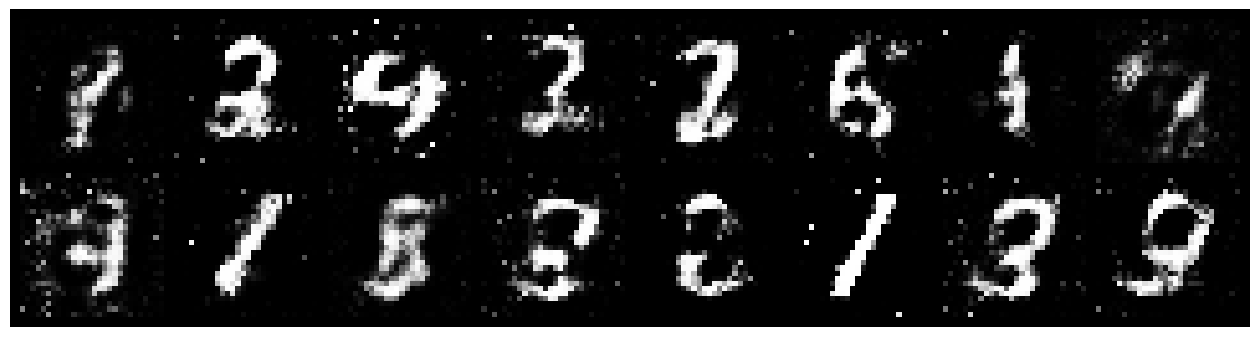

Epoch: [16/200], Batch Num: [599/600]
Discriminator Loss: 1.0900, Generator Loss: 1.4035
D(x): 0.6407, D(G(z)): 0.3738


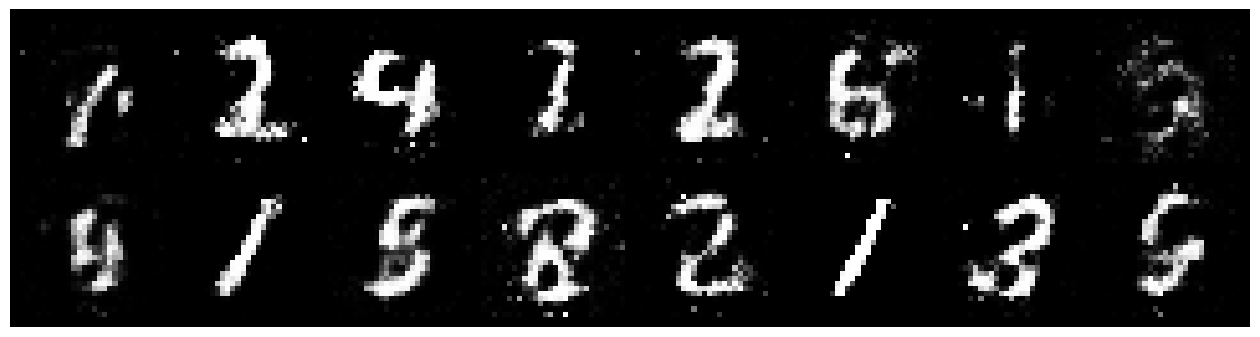

Epoch: [17/200], Batch Num: [599/600]
Discriminator Loss: 0.9857, Generator Loss: 1.2731
D(x): 0.6369, D(G(z)): 0.2840


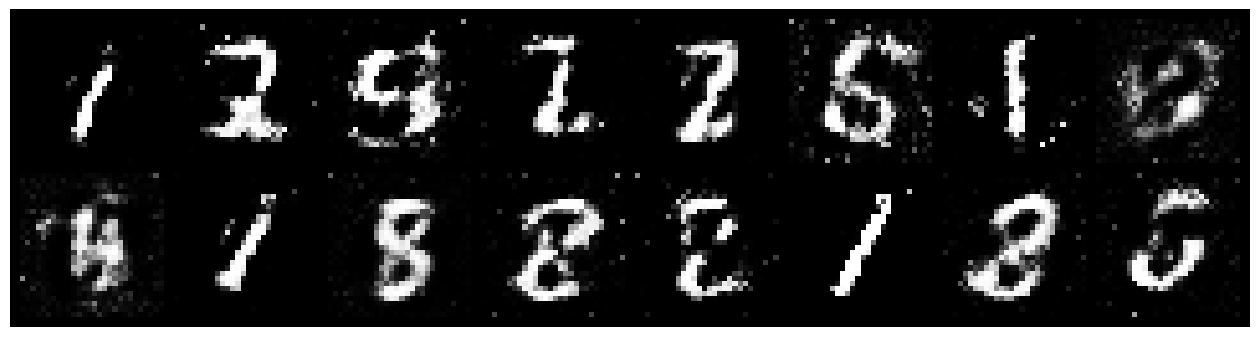

Epoch: [18/200], Batch Num: [599/600]
Discriminator Loss: 1.1126, Generator Loss: 1.3977
D(x): 0.6792, D(G(z)): 0.3758


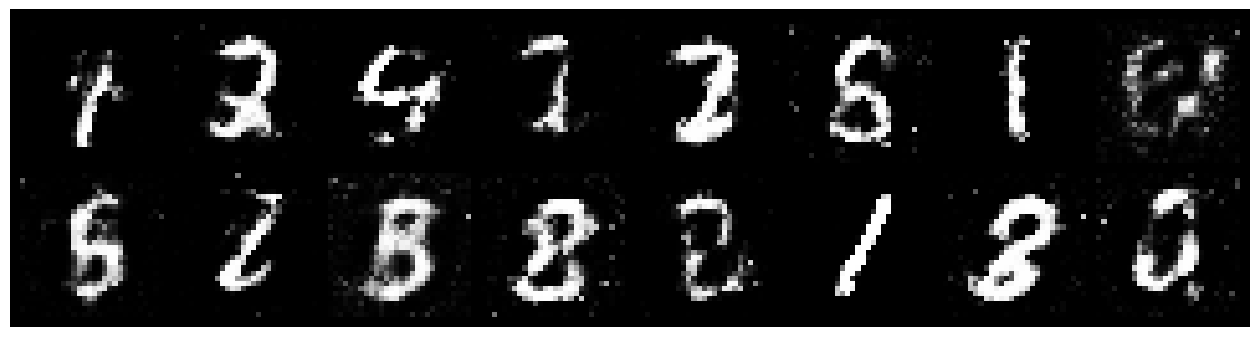

Epoch: [19/200], Batch Num: [599/600]
Discriminator Loss: 1.0154, Generator Loss: 1.4987
D(x): 0.7036, D(G(z)): 0.3679


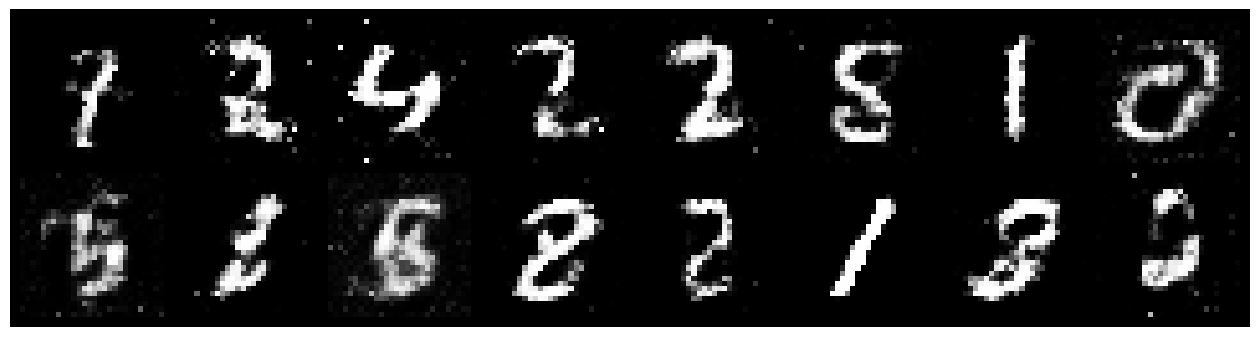

Epoch: [20/200], Batch Num: [599/600]
Discriminator Loss: 1.0242, Generator Loss: 1.1981
D(x): 0.6451, D(G(z)): 0.3614


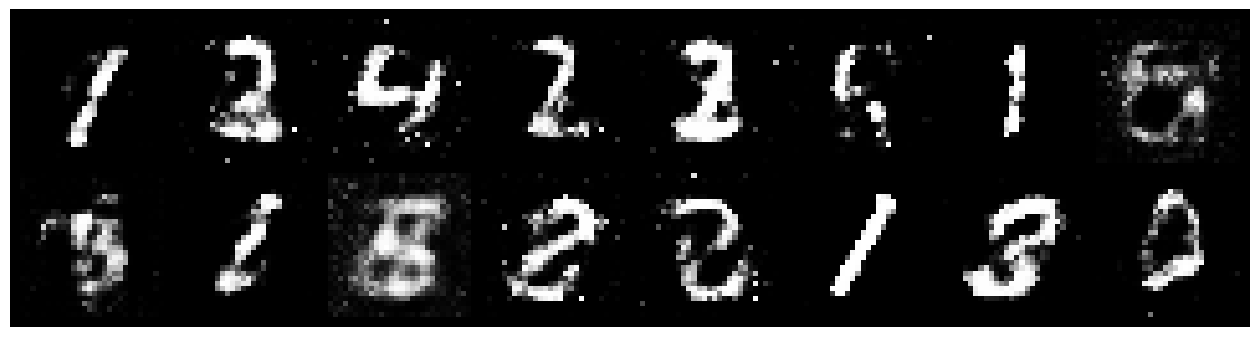

Epoch: [21/200], Batch Num: [599/600]
Discriminator Loss: 1.0239, Generator Loss: 1.0579
D(x): 0.6566, D(G(z)): 0.3805


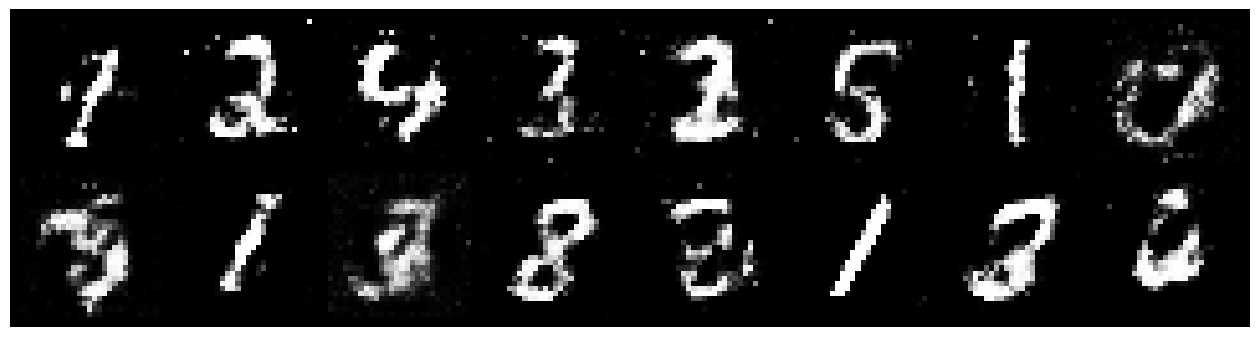

Epoch: [22/200], Batch Num: [599/600]
Discriminator Loss: 1.1622, Generator Loss: 1.2361
D(x): 0.5734, D(G(z)): 0.3288


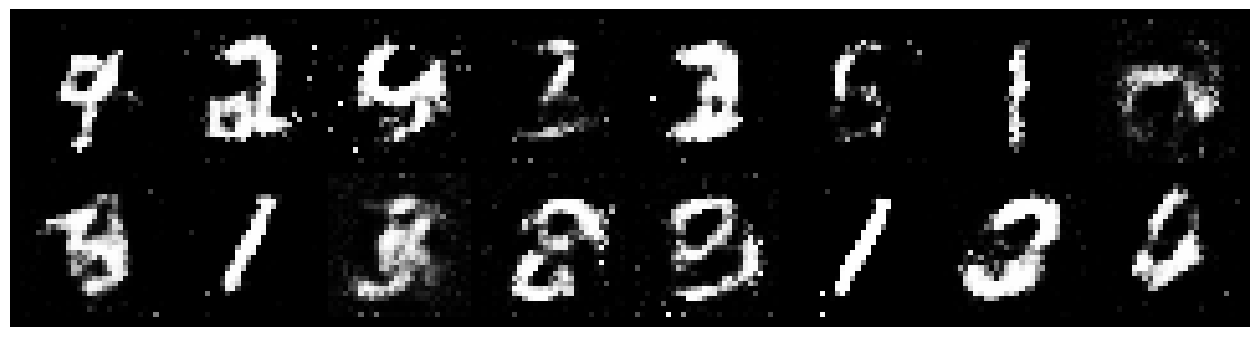

Epoch: [23/200], Batch Num: [599/600]
Discriminator Loss: 0.9515, Generator Loss: 1.2119
D(x): 0.6518, D(G(z)): 0.3250


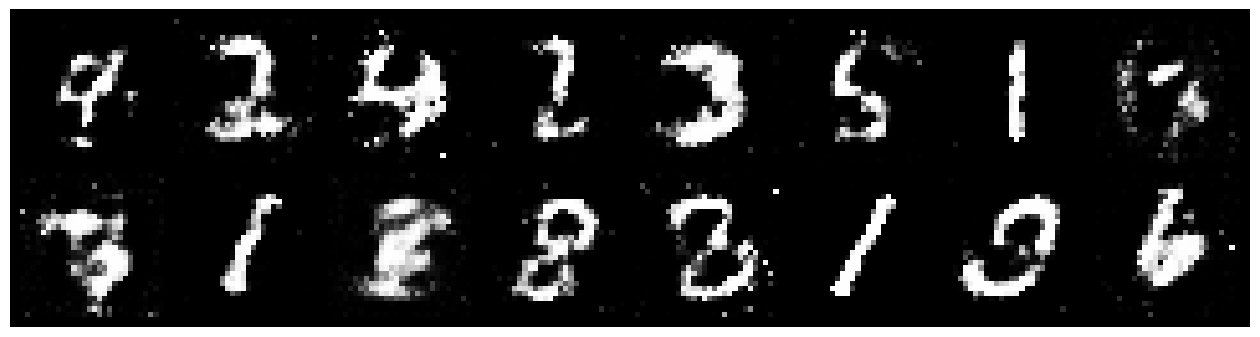

Epoch: [24/200], Batch Num: [599/600]
Discriminator Loss: 1.0729, Generator Loss: 1.1108
D(x): 0.6596, D(G(z)): 0.3809


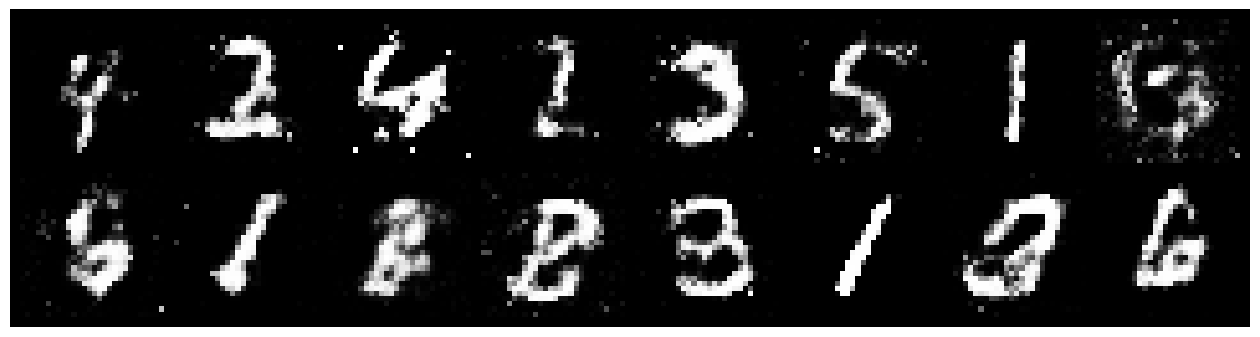

Epoch: [25/200], Batch Num: [599/600]
Discriminator Loss: 1.0717, Generator Loss: 1.1203
D(x): 0.7400, D(G(z)): 0.4239


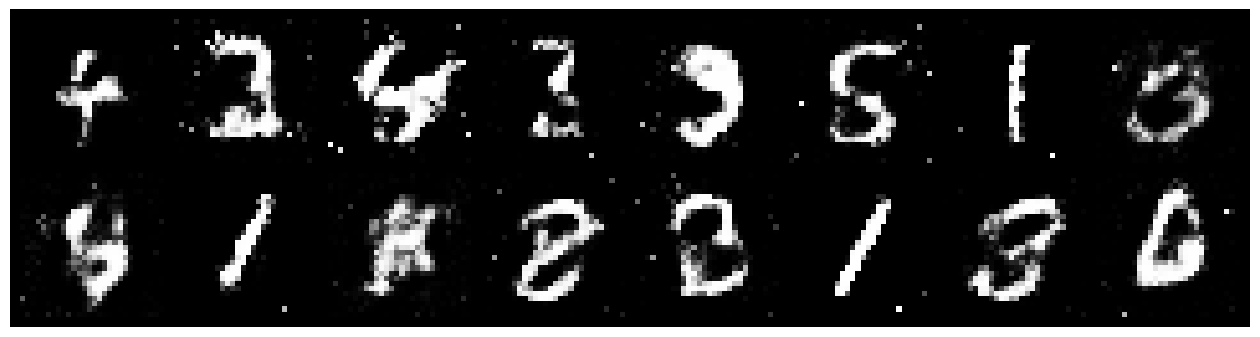

Epoch: [26/200], Batch Num: [599/600]
Discriminator Loss: 1.2446, Generator Loss: 1.1419
D(x): 0.5868, D(G(z)): 0.3902


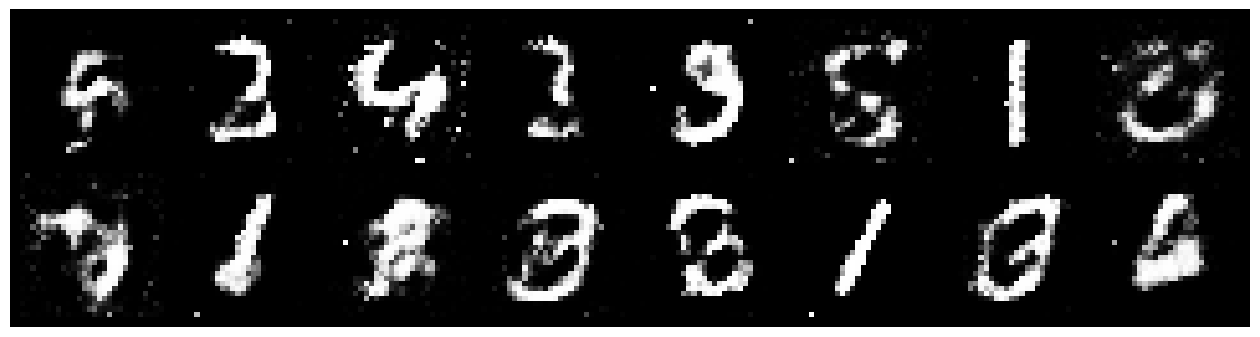

Epoch: [27/200], Batch Num: [599/600]
Discriminator Loss: 1.1150, Generator Loss: 1.4199
D(x): 0.6383, D(G(z)): 0.3601


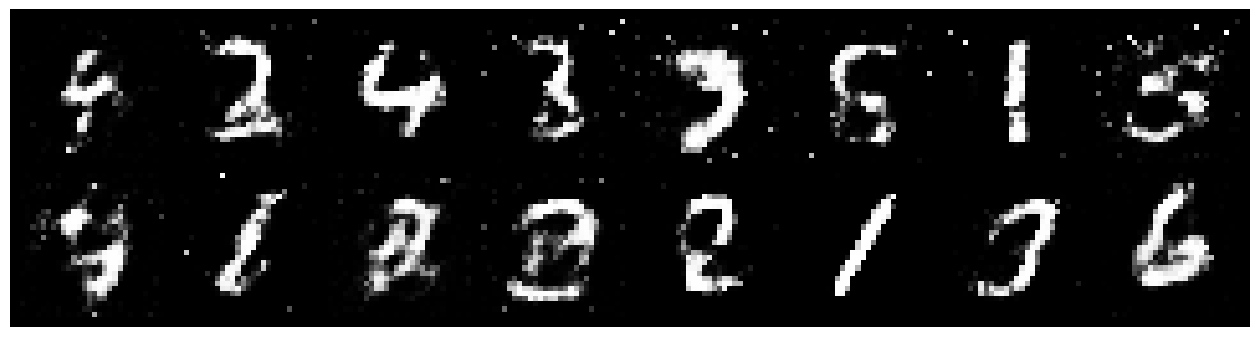

Epoch: [28/200], Batch Num: [599/600]
Discriminator Loss: 0.9676, Generator Loss: 1.2820
D(x): 0.6843, D(G(z)): 0.3734


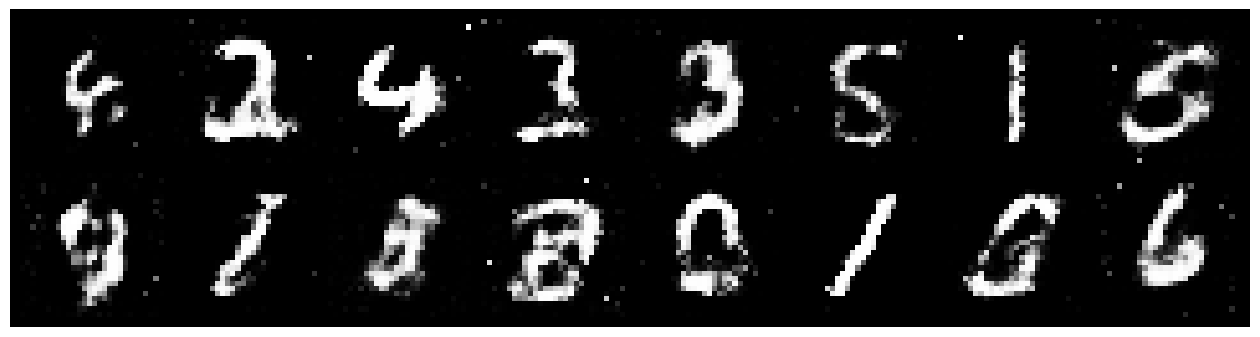

Epoch: [29/200], Batch Num: [599/600]
Discriminator Loss: 1.0783, Generator Loss: 1.2674
D(x): 0.7039, D(G(z)): 0.3966


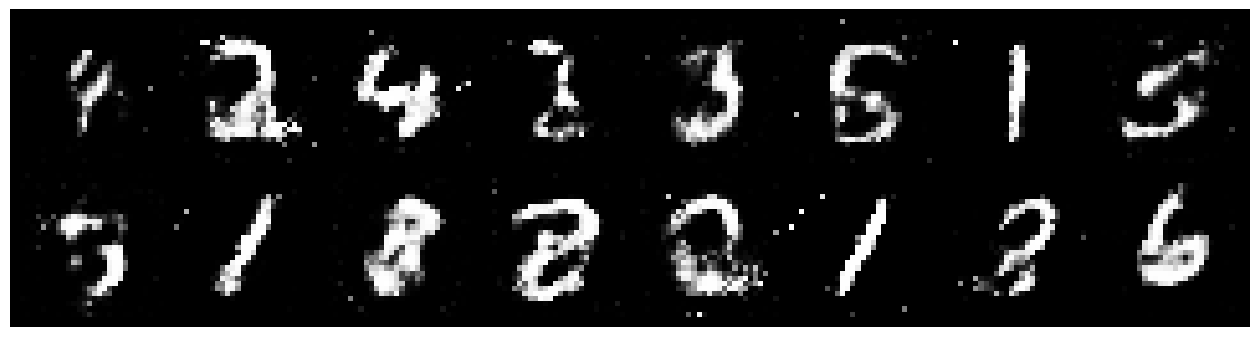

Epoch: [30/200], Batch Num: [599/600]
Discriminator Loss: 1.1202, Generator Loss: 1.0094
D(x): 0.6595, D(G(z)): 0.4475


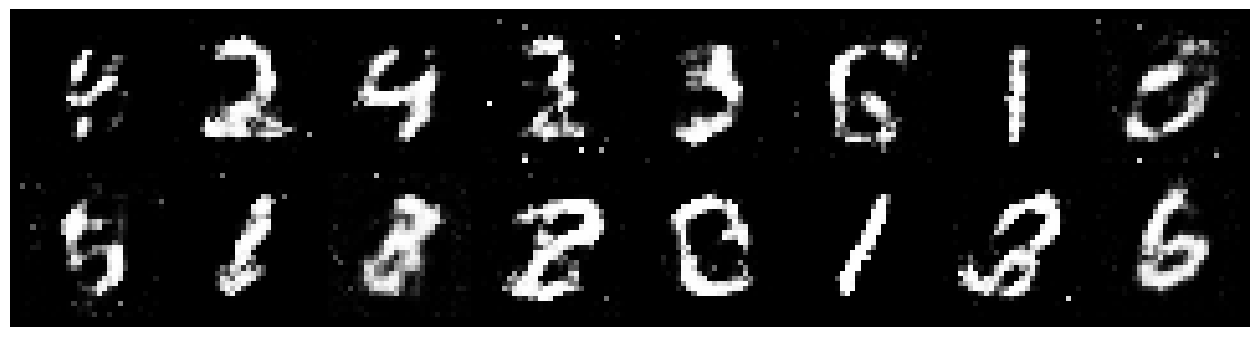

Epoch: [31/200], Batch Num: [599/600]
Discriminator Loss: 1.1394, Generator Loss: 1.1212
D(x): 0.6197, D(G(z)): 0.3917


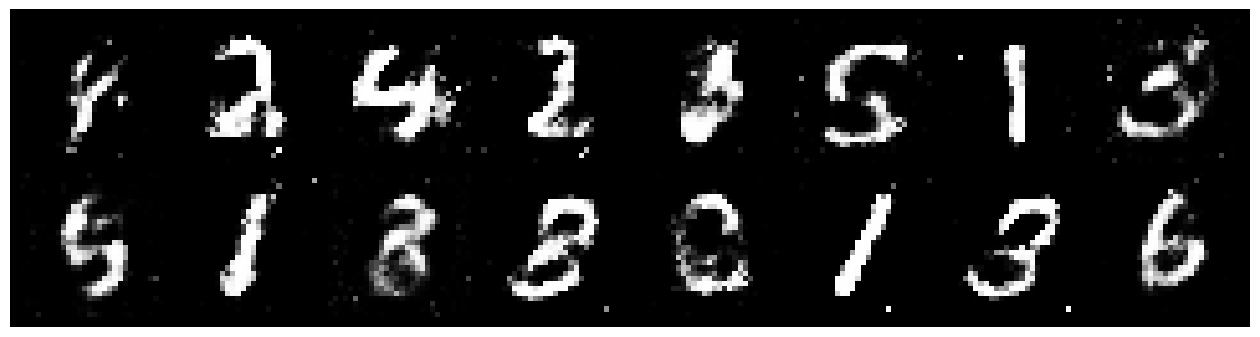

Epoch: [32/200], Batch Num: [599/600]
Discriminator Loss: 1.1075, Generator Loss: 1.3786
D(x): 0.5717, D(G(z)): 0.3167


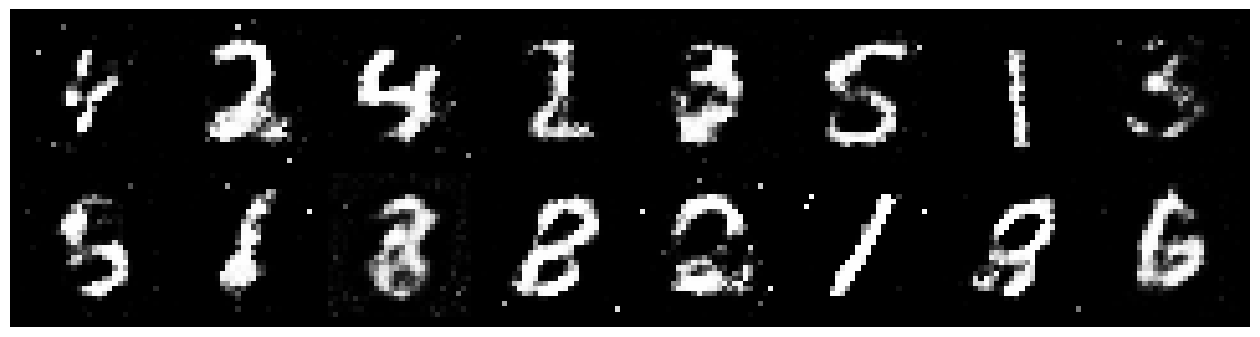

Epoch: [33/200], Batch Num: [599/600]
Discriminator Loss: 1.1835, Generator Loss: 1.0204
D(x): 0.6053, D(G(z)): 0.4344


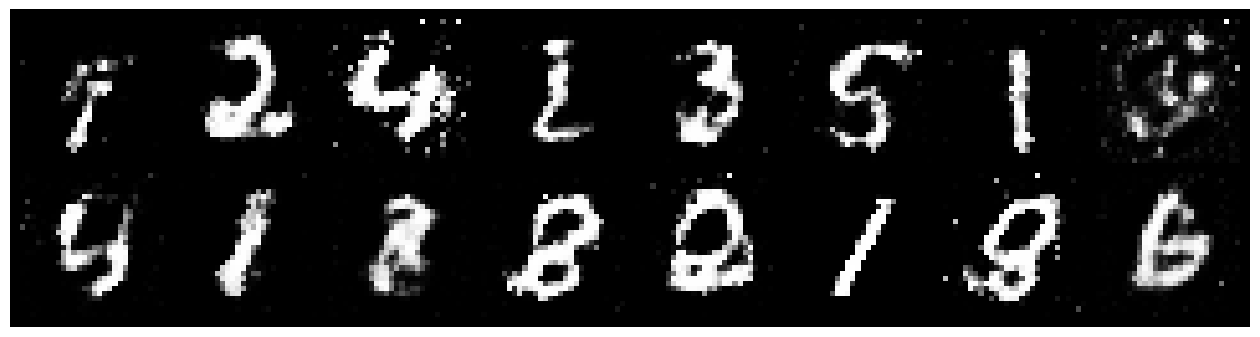

Epoch: [34/200], Batch Num: [599/600]
Discriminator Loss: 1.0832, Generator Loss: 1.0321
D(x): 0.6177, D(G(z)): 0.3768


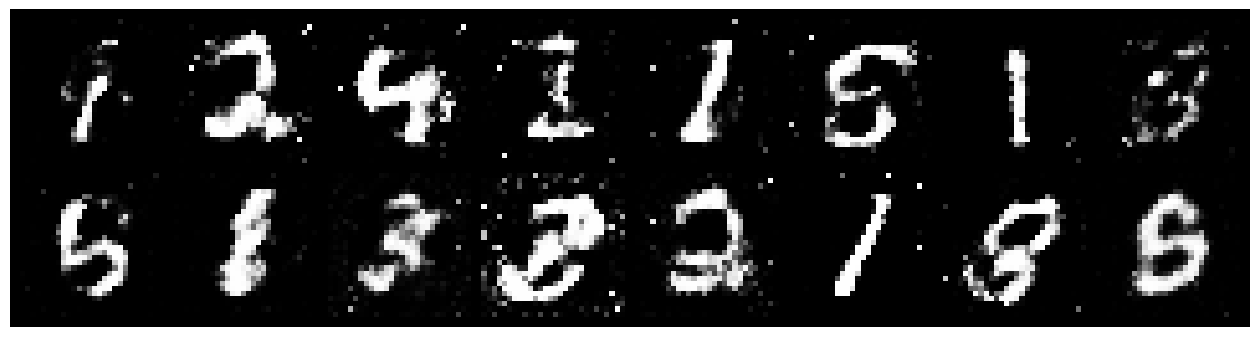

Epoch: [35/200], Batch Num: [599/600]
Discriminator Loss: 1.0776, Generator Loss: 1.1117
D(x): 0.6419, D(G(z)): 0.4122


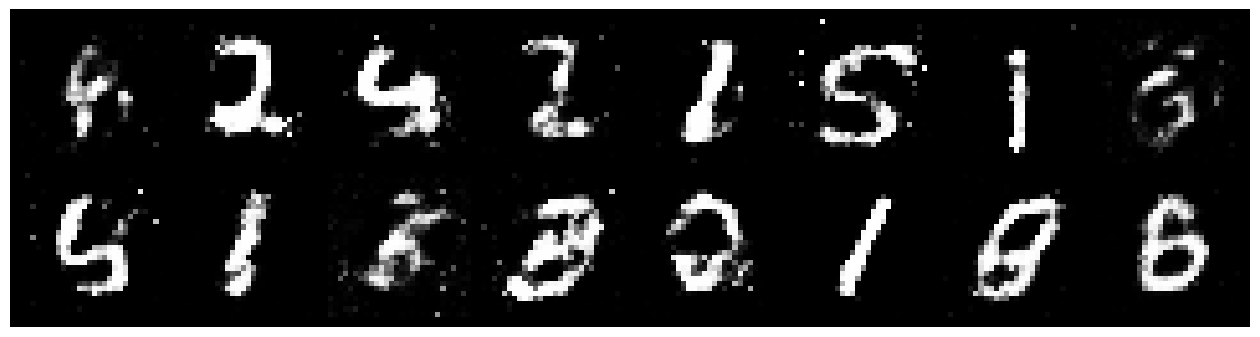

Epoch: [36/200], Batch Num: [599/600]
Discriminator Loss: 1.1690, Generator Loss: 0.8589
D(x): 0.5701, D(G(z)): 0.4156


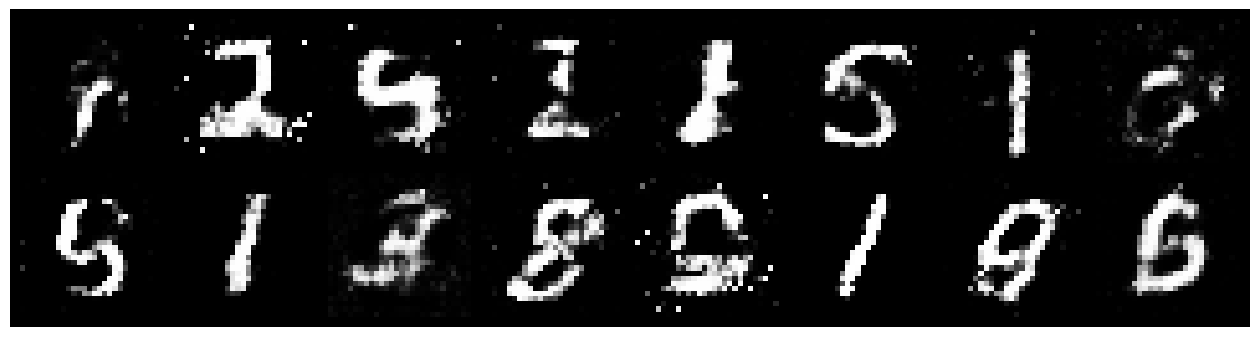

Epoch: [37/200], Batch Num: [599/600]
Discriminator Loss: 1.2517, Generator Loss: 0.9823
D(x): 0.6170, D(G(z)): 0.4659


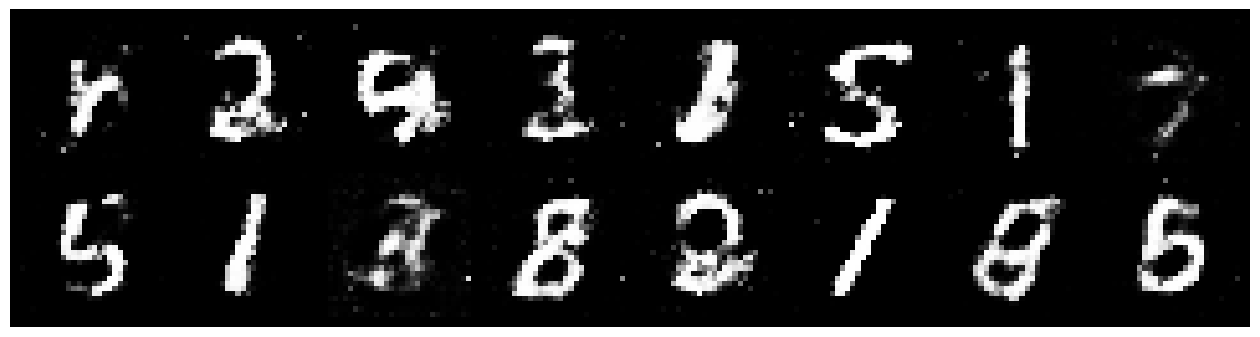

Epoch: [38/200], Batch Num: [599/600]
Discriminator Loss: 1.0679, Generator Loss: 1.3042
D(x): 0.6307, D(G(z)): 0.3543


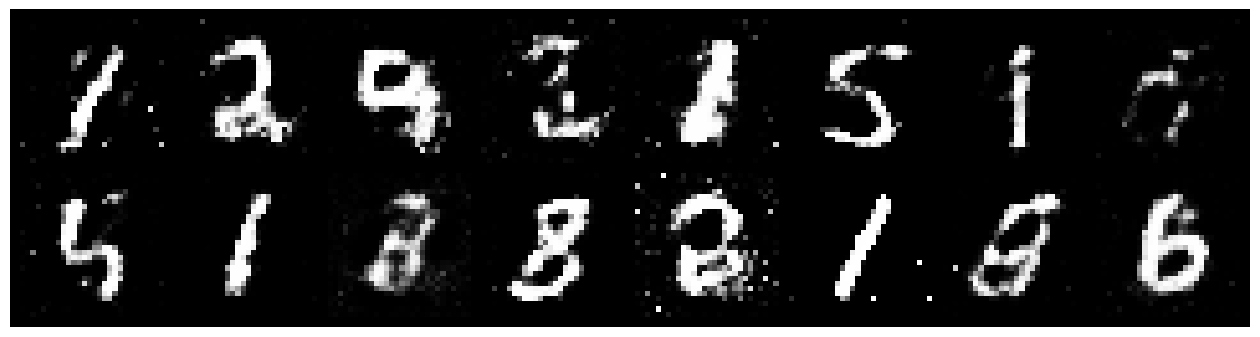

Epoch: [39/200], Batch Num: [599/600]
Discriminator Loss: 1.1548, Generator Loss: 1.2239
D(x): 0.5797, D(G(z)): 0.3534


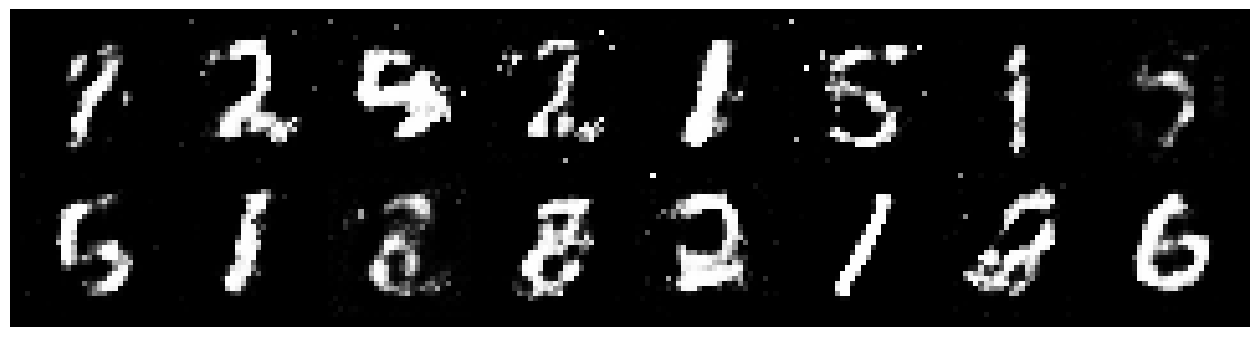

Epoch: [40/200], Batch Num: [599/600]
Discriminator Loss: 1.1225, Generator Loss: 1.3099
D(x): 0.6822, D(G(z)): 0.4145


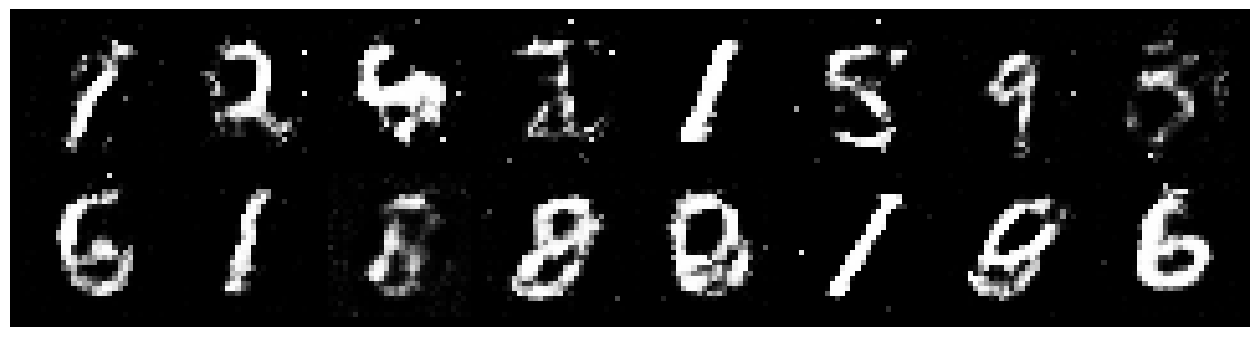

Epoch: [41/200], Batch Num: [599/600]
Discriminator Loss: 1.2260, Generator Loss: 1.2323
D(x): 0.5414, D(G(z)): 0.3725


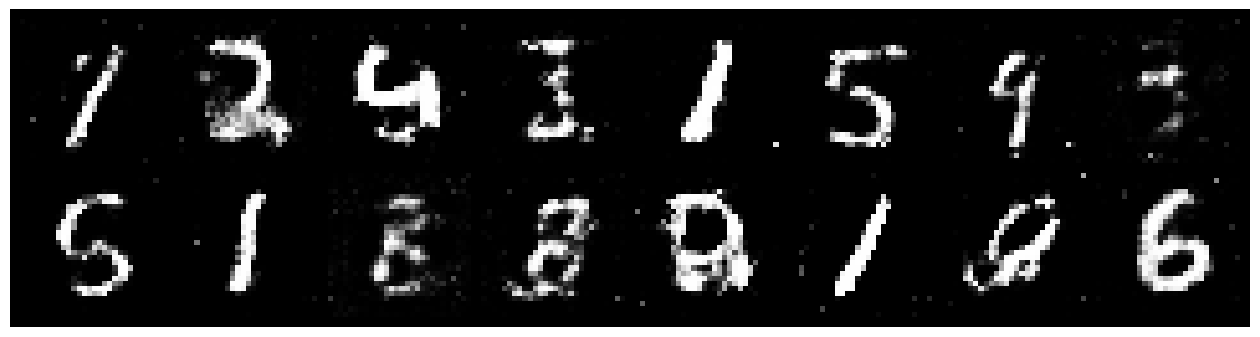

Epoch: [42/200], Batch Num: [599/600]
Discriminator Loss: 1.2406, Generator Loss: 1.0588
D(x): 0.6083, D(G(z)): 0.4252


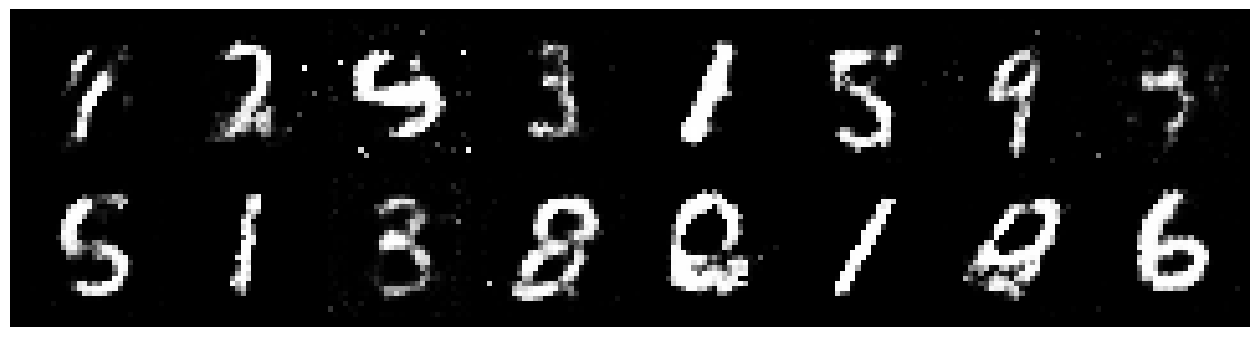

Epoch: [43/200], Batch Num: [599/600]
Discriminator Loss: 1.2586, Generator Loss: 1.1470
D(x): 0.5893, D(G(z)): 0.4204


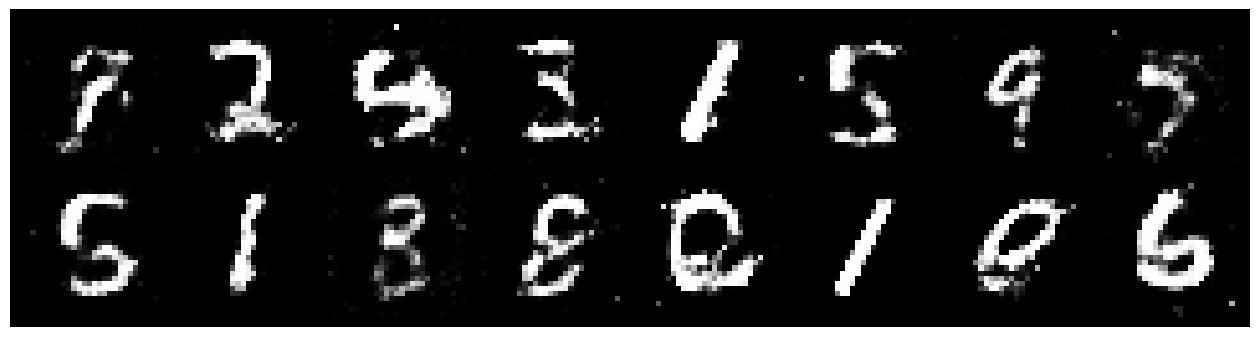

Epoch: [44/200], Batch Num: [599/600]
Discriminator Loss: 1.1678, Generator Loss: 1.0721
D(x): 0.5992, D(G(z)): 0.4231


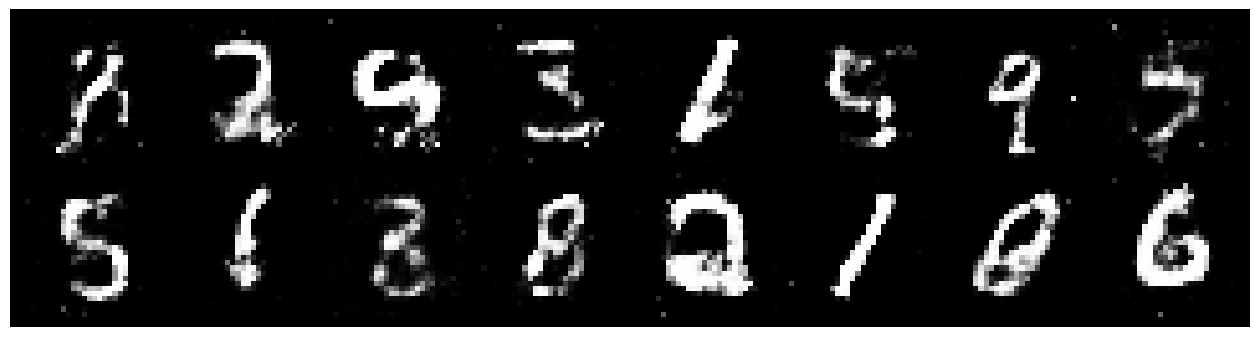

Epoch: [45/200], Batch Num: [599/600]
Discriminator Loss: 1.1812, Generator Loss: 1.0141
D(x): 0.6117, D(G(z)): 0.4195


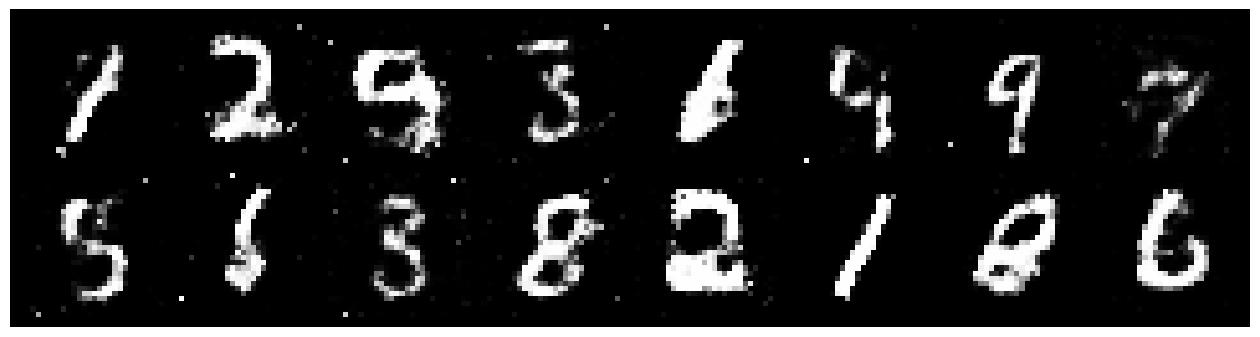

Epoch: [46/200], Batch Num: [599/600]
Discriminator Loss: 1.0256, Generator Loss: 1.2789
D(x): 0.6612, D(G(z)): 0.3863


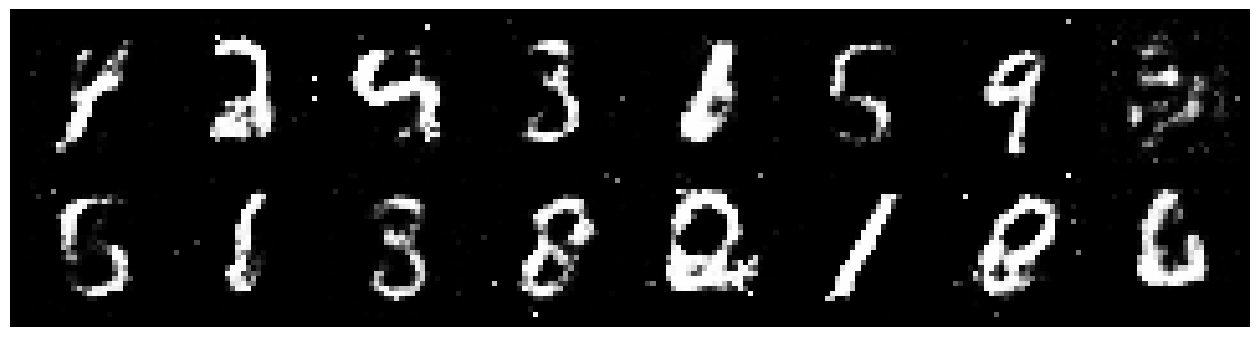

Epoch: [47/200], Batch Num: [599/600]
Discriminator Loss: 1.1809, Generator Loss: 1.0161
D(x): 0.5653, D(G(z)): 0.4053


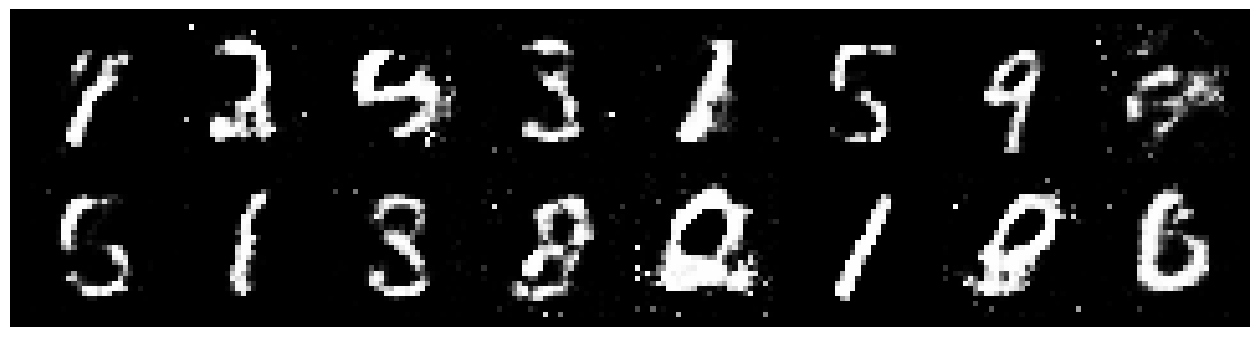

Epoch: [48/200], Batch Num: [599/600]
Discriminator Loss: 1.2155, Generator Loss: 1.0503
D(x): 0.5727, D(G(z)): 0.4145


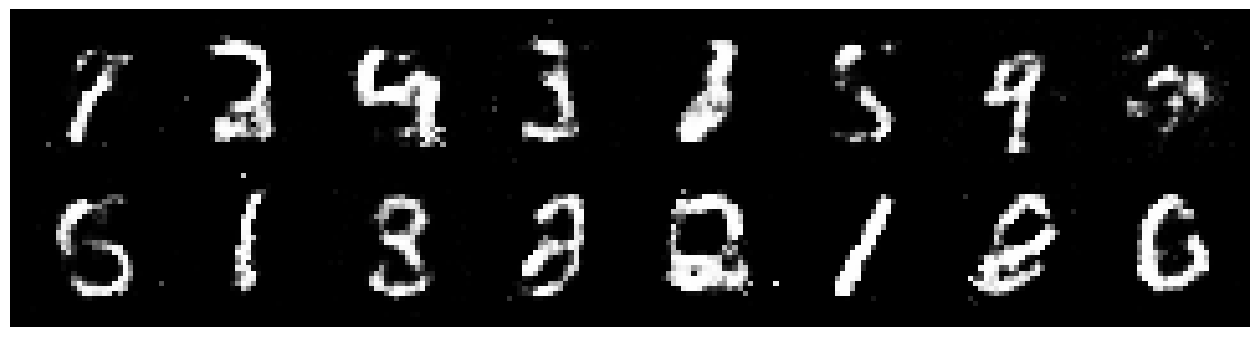

Epoch: [49/200], Batch Num: [599/600]
Discriminator Loss: 1.2449, Generator Loss: 1.0104
D(x): 0.5524, D(G(z)): 0.3901


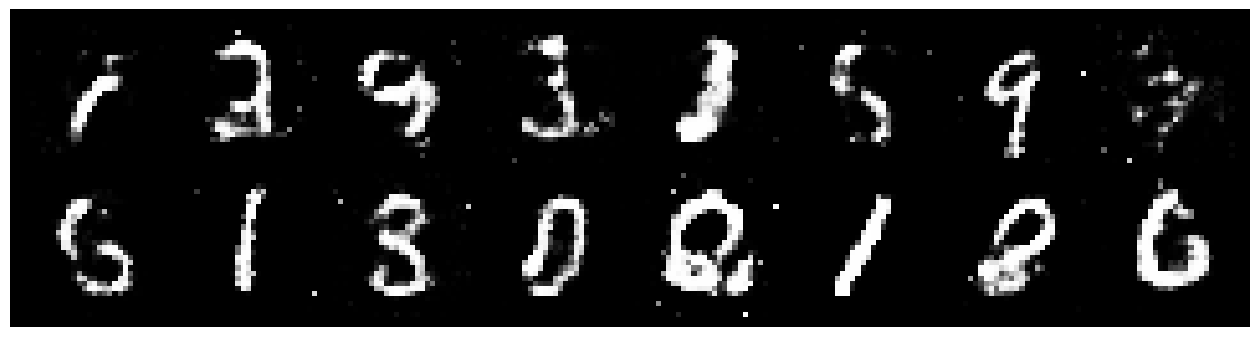

Epoch: [50/200], Batch Num: [599/600]
Discriminator Loss: 1.0571, Generator Loss: 1.1612
D(x): 0.6100, D(G(z)): 0.3506


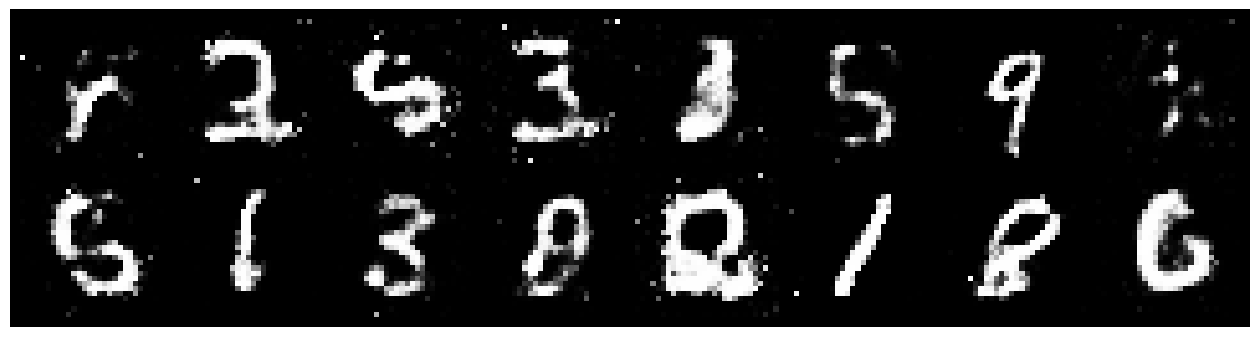

Epoch: [51/200], Batch Num: [599/600]
Discriminator Loss: 1.1565, Generator Loss: 1.0624
D(x): 0.5700, D(G(z)): 0.3773


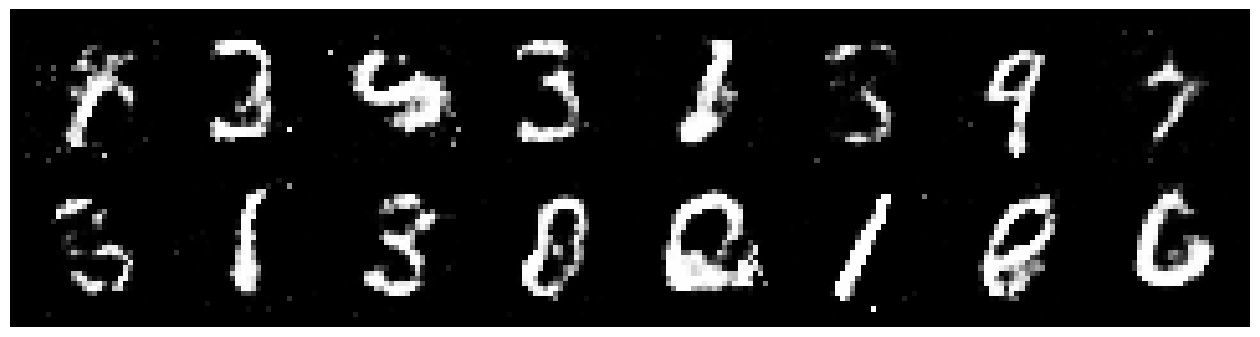

Epoch: [52/200], Batch Num: [599/600]
Discriminator Loss: 1.0867, Generator Loss: 1.1440
D(x): 0.6002, D(G(z)): 0.3679


In [ ]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 200
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches

    test_images = vectors_to_images(generator(test_noise))
    test_images = test_images.data
    logger.log_images(
        test_images, num_test_samples, 
        epoch, n_batch, num_batches
    );
    # Display status Logs
    logger.display_status(
        epoch, num_epochs, n_batch, num_batches,
        d_error, g_error, d_pred_real, d_pred_fake
    )